# Exploratory Descriptive Analysis of Local Transportation

This is an Exploratory Descriptive Analysis of expenditure with local transportation. In this notebook, we will join the analysis of the subquotas "Taxi, toll and parking", "Automotive vehicle renting or charter" and "Fuels and lubricants".

The subquota "Automotive vehicle renting or charter" changed in the time. It started like "Automotive vehicle renting or watercraft charter" and in October/2013 was split in "Watercraft renting or charter" and "Automotive vehicle renting or charter". 

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [52]:
data = pd.read_csv('../data/2017-03-15-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})

First step is subset the data of local transportation of all reimbursements

In [53]:
taxi = data[(data['subquota_description'] == 'Taxi, toll and parking')]
fuel = data[(data['subquota_description'] == 'Fuels and lubricants')]
rent_car_and_boat = data[(data['subquota_description'] =='Automotive vehicle renting or watercraft charter')]
rent_car = data[(data['subquota_description'] == 'Automotive vehicle renting or charter')]
rent_boat = data[(data['subquota_description'] =='Watercraft renting or charter')]

In [54]:
transportation = pd.DataFrame()
transportation = transportation.append(taxi)
transportation = transportation.append(fuel)
transportation = transportation.append(rent_car_and_boat)
transportation = transportation.append(rent_car)
transportation = transportation.append(rent_boat)

Then, we will analyse total expenses by month.

In [55]:
transportation_month = transportation.groupby(['year',
                                               'month']).agg({'total_net_value':sum})

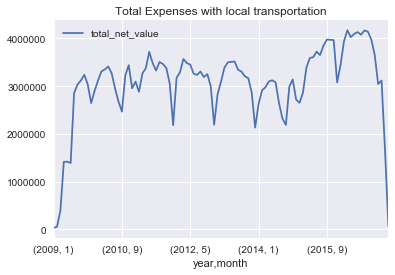

In [56]:
transportation_month.plot()
plt.title('Total Expenses with local transportation')

Here we can observe that the total expenses didn't change so much. There was an increase in 2015/16 when the limit of "Fuels and lubricants" raised to R$6,000.

Now we will analyze the total expenses by month for each subquota. It necessary to pay attention when each subquota started, "Taxi, toll and parking" started in October/2013, the same date when "Automotive vehicle renting or watercraft charter" was split. There are "Fuels and lubricants" reimbursement since 2009.

In [57]:
taxi_month = taxi.groupby(['year','month']).agg({'total_net_value':sum})
fuel_month = fuel.groupby(['year','month']).agg({'total_net_value':sum})
rent_car_and_boat_month = rent_car_and_boat.groupby(['year','month']).agg({'total_net_value':sum})
rent_car_month = rent_car.groupby(['year','month']).agg({'total_net_value':sum})
rent_boat_month = rent_boat.groupby(['year','month']).agg({'total_net_value':sum})

(0, 2500000)

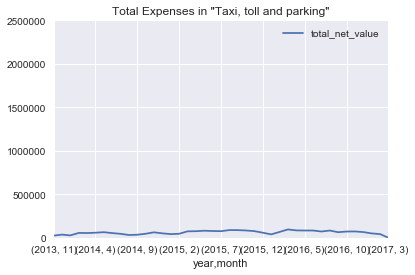

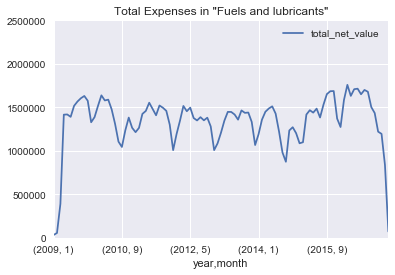

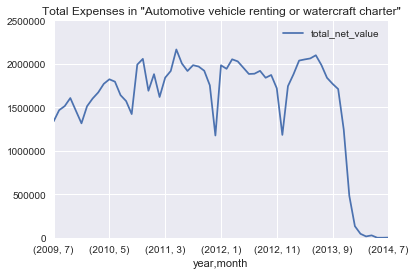

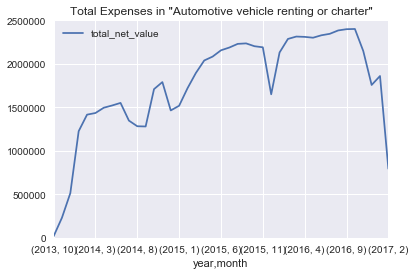

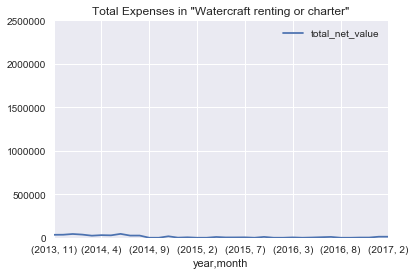

In [58]:
taxi_month.plot()
plt.title('Total Expenses in "Taxi, toll and parking"')
plt.ylim([0, 2500000])

fuel_month.plot()
plt.title('Total Expenses in "Fuels and lubricants"')
plt.ylim([0, 2500000])

rent_car_and_boat_month.plot()
plt.title('Total Expenses in "Automotive vehicle renting or watercraft charter"')
plt.ylim([0, 2500000])

rent_car_month.plot()
plt.title('Total Expenses in "Automotive vehicle renting or charter"')
plt.ylim([0, 2500000])

rent_boat_month.plot()
plt.title('Total Expenses in "Watercraft renting or charter"')
plt.ylim([0, 2500000])

Now we will check the mean of all expenses per congressman.

In [59]:
transportation_mean = transportation.groupby(['year',
                                              'month',
                                              'congressperson_id']).agg({'total_net_value':sum})
transportation_mean = transportation_mean.reset_index()
transportation_mean = transportation_mean.groupby(['year',
                                                   'month']).agg({'total_net_value':'mean'})

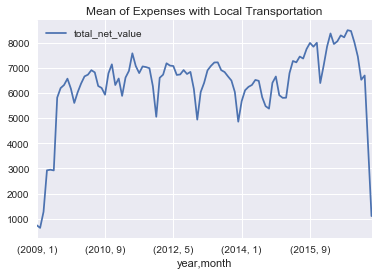

In [60]:
transportation_mean.plot()
plt.title('Mean of Expenses with Local Transportation')

And mean per subquota.

In [61]:
#'Taxi, toll and parking'
taxi_mean = taxi.groupby(['year',
                          'month',
                          'congressperson_id']).agg({'total_net_value':sum})
taxi_mean = taxi_mean.reset_index()
taxi_mean = taxi_mean.groupby(['year',
                               'month']).agg({'total_net_value':'mean'})

#'Fuels and lubricants'
fuel_mean = fuel.groupby(['year',
                          'month',
                          'congressperson_id']).agg({'total_net_value':sum})
fuel_mean = fuel_mean.reset_index()
fuel_mean = fuel_mean.groupby(['year',
                               'month']).agg({'total_net_value':'mean'})

#'Automotive vehicle renting or watercraft charter'
rent_car_and_boat_mean = rent_car_and_boat.groupby(['year',
                                                    'month',
                                                    'congressperson_id']).agg({'total_net_value':sum})
rent_car_and_boat_mean = rent_car_and_boat_mean.reset_index()
rent_car_and_boat_mean = rent_car_and_boat_mean.groupby(['year',
                                                         'month']).agg({'total_net_value':'mean'})

#'Automotive vehicle renting or charter'
rent_car_mean = rent_car.groupby(['year',
                                  'month',
                                  'congressperson_id']).agg({'total_net_value':sum})
rent_car_mean = rent_car_mean.reset_index()
rent_car_mean = rent_car_mean.groupby(['year',
                                       'month']).agg({'total_net_value':'mean'})

#'Watercraft renting or charter'
rent_boat_mean = rent_boat.groupby(['year',

                                    'month',
                                    'congressperson_id']).agg({'total_net_value':sum})
rent_boat_mean = rent_boat_mean.reset_index()
rent_boat_mean = rent_boat_mean.groupby(['year',
                                         'month']).agg({'total_net_value':'mean'})

(0, 27000)

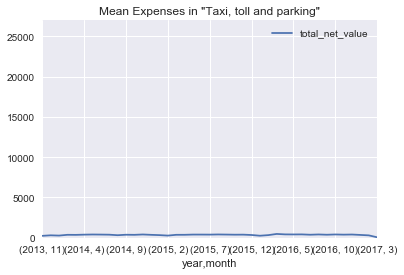

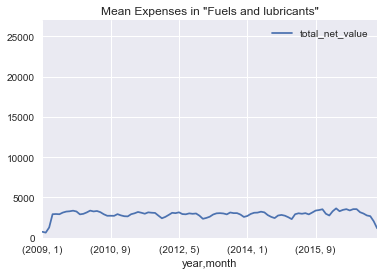

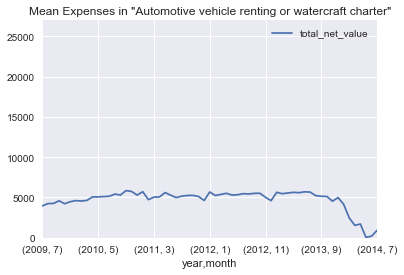

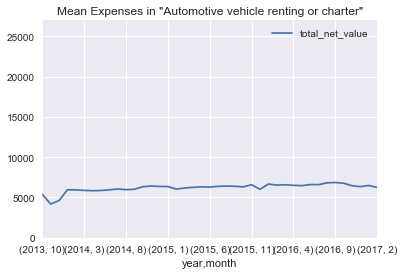

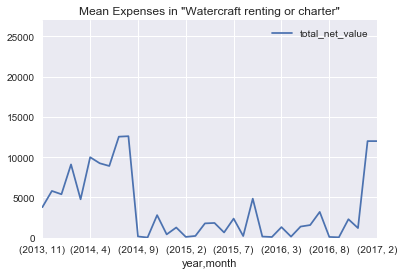

In [62]:
taxi_mean.plot()
plt.title('Mean Expenses in "Taxi, toll and parking"')
plt.ylim([0, 27000])

fuel_mean.plot()
plt.title('Mean Expenses in "Fuels and lubricants"')
plt.ylim([0, 27000])

rent_car_and_boat_mean.plot()
plt.title('Mean Expenses in "Automotive vehicle renting or watercraft charter"')
plt.ylim([0, 27000])

rent_car_mean.plot()
plt.title('Mean Expenses in "Automotive vehicle renting or charter"')
plt.ylim([0, 27000])

rent_boat_mean.plot()
plt.title('Mean Expenses in "Watercraft renting or charter"')
plt.ylim([0, 27000])

The "Taxi, toll and parking" expenses were much lower than the other subquotas, for now, we will not analyze it.

# "Fuels and lubricants"

When we read the legislation about [CEAP](http://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-normaatualizada-cd-mesa.pdf) the Art 2°, § 1° said:

*"§ 1º As despesas estabelecidas nos incisos I, VII e VIII poderão ser realizadas por assessores, assim entendidos os servidores efetivos, os ocupantes de cargos de natureza especial ou secretários parlamentares vinculados à Câmara dos Deputados.*

*§ 1º The expenses established in items I, VII and VIII may be performed by advisors, understood as the effective servants, occupants of special positions or parliamentary secretaries attached to the Chamber of Deputies."*

So, we understanding that expenses with "Fuel and Lubricants" (item IX) can't be used by advisors, only by the congressman.

Now we will try to find some reimbursements suspects in subquota "Fuel and lubricants". We will use the worst case acceptable to find a limit to expenses, any reimbursement greater than this limit we will consider a suspect reimbursement.

### We will consider suspecting all reimbursements that exceed the max cost of R$917.00.

The max cost was calculate using the worst case that is possible to fill a gas and lubricant tank of a car. We used the biggest gas tank in Brazilian market (Ford F-250 with 110l tank),
the cost of gas in the most expense gas station in Brazil (R4.70) and 10l of most expensive lubricant (R$40.00). Most of the service stations don't charge to change lubricants.

Sources: 

[Cost of gas](http://www.anp.gov.br/preco/prc/Resumo_Semanal_Combustiveis.asp in 25/apr/2017)

[Lubricant capacity](http://www.autoideia.com.br/capacidade_oleo_motor_automoveis&codmar=ford)

[Cost of lubricant](http://www.mercadomineiro.com.br/pesquisa/oleo-lubrificante-pesquisa-precos)

[Tanks size](https://panelinhanet.wordpress.com/2013/02/20/combustivel-quantos-litros-cabem-no-tanque-do-seu-veiculo/)  in 18/mar/2017 

In [63]:
fuel_cost = 4.70
fuel_capacity = 110
lubricant_cost = 40
lubricant_capacity = 10
max_cost = fuel_cost*fuel_capacity + lubricant_cost*lubricant_capacity
max_cost

917.0

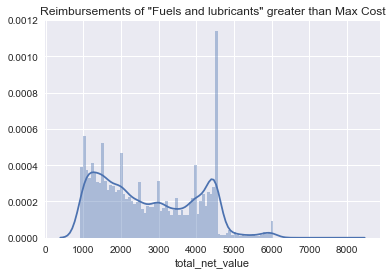

In [64]:
fuel_outliers = fuel[fuel['total_net_value'] > max_cost].sort_values('total_net_value', ascending=False)
sns.distplot(fuel_outliers['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" greater than Max Cost')

In [65]:
fuel_outliers['total_net_value'].sum()

69872680.549999997

In [66]:
fuel_outliers['total_net_value'].describe()

count    25697.000000
mean      2719.098749
std       1277.731109
min        917.040000
25%       1549.040000
50%       2500.000000
75%       3926.920000
max       7937.630000
Name: total_net_value, dtype: float64

If we want to be benevolent with the congresspeople we would admit that these reimbursements were the payment of full month, and they agree with the gas station to pay all in only one payment. So let's calculate the max cost of a month.

Using the same logic of worst case, we will consider that the congresspeople drove the same distance that a taxi driver in São Paulo. In São Paulo there is 3,491 taxi drivers work for a taxi company and they drive 20,000,000 km per month. It's about 5,729km per month for each driver.

Consumption of gas of Ford F-250 - 6.93 Km/L

Most expensive cost of gas on Brasília - R$3.88/L

### The max cost for a full month is R$3,207.

Sources:

[Statistics of Taxi in SP](http://www.adetax.com.br/index.php/informacoes-e-servicos/estatisticas/)

[Ford F-250](http://www.vrum.com.br/fichatecnica/Ford/F_250/2002/003114-3)

[Cost of gas](http://www.anp.gov.br/preco/prc/Resumo_Semanal_Combustiveis.asp in 25/apr/2017)

In [67]:
fuel_cost = 3.88
distance = 5729
consumption = 6.93
max_cost_month = (distance / consumption) * fuel_cost
max_cost_month

3207.5786435786436

Now we will divide the suspects reimbursements in Red Flag (above monthly max cost) and yellow flag (above a max cost for a single tank but below a monthly cost).

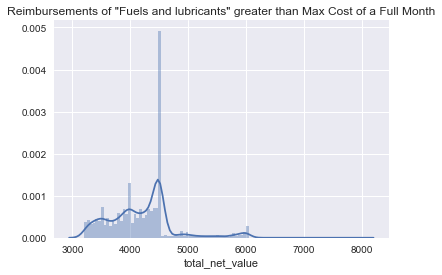

In [68]:
fuel_outliers_redflag = fuel_outliers[fuel_outliers['total_net_value'] >= max_cost_month].sort_values('total_net_value', ascending=False)
fuel_outliers_redflag['suspect'] = "Fuel Red Flag"
sns.distplot(fuel_outliers_redflag['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" greater than Max Cost of a Full Month')

In [69]:
fuel_outliers_redflag['total_net_value'].sum()

39222033.210000001

In [70]:
fuel_outliers_redflag['total_net_value'].describe()

count    9359.000000
mean     4190.835902
std       566.030418
min      3207.650000
25%      3805.590000
50%      4207.500000
75%      4500.000000
max      7937.630000
Name: total_net_value, dtype: float64

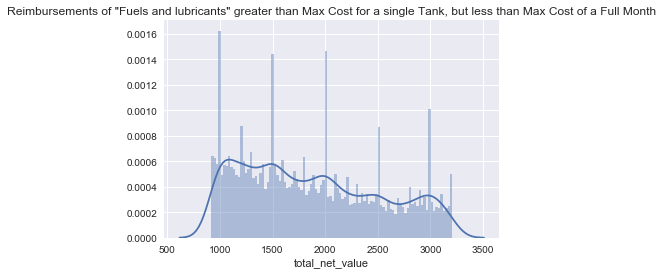

In [71]:
fuel_outliers_yellowflag = fuel_outliers[fuel_outliers['total_net_value'] < max_cost_month].sort_values('total_net_value', ascending=False)
fuel_outliers_yellowflag['suspect'] = "Fuel Yellow Flag"
sns.distplot(fuel_outliers_yellowflag['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" greater than Max Cost for a single Tank, but less than Max Cost of a Full Month')

In [72]:
fuel_outliers_yellowflag['total_net_value'].sum()

30650647.340000004

In [73]:
fuel_outliers_yellowflag['total_net_value'].describe()

count    16338.000000
mean      1876.034236
std        657.795782
min        917.040000
25%       1302.132500
50%       1788.300000
75%       2400.000000
max       3207.520000
Name: total_net_value, dtype: float64

### We found 9,359 reimbursements (R$39.2 millions - Red Flag) without justification to be so expensive and other 16,338 (R30.6 millions - Yellow Flag) very suspect.

Until now we checked the expenses of single reimbursements, next step is to check if the sum of all reimbursements in a month is greater than the monthly max cost.

In [74]:
fuel_congressperson = fuel.groupby(['congressperson_id',
                                    'year',
                                    'month']).agg({'total_net_value':sum})
fuel_congressperson = fuel_congressperson.reset_index()
fuel_congressperson = fuel_congressperson[fuel_congressperson['total_net_value'] >= max_cost_month].reset_index()
fuel_congressperson['cong_year_month'] = fuel_congressperson['congressperson_id'].map(str)+fuel_congressperson['year'].map(str)+fuel_congressperson['month'].map(str)
cong_year_month = fuel_congressperson['cong_year_month'].unique()

fuel['cong_year_month'] = fuel['congressperson_id'].map(str)+fuel['year'].map(str)+fuel['month'].map(str)
fuel_outlier_monthlycost = fuel[fuel['cong_year_month'].isin(cong_year_month)]

suspects = fuel_outliers['document_id'].unique()

fuel_outlier_monthlycost = fuel_outlier_monthlycost[~fuel_outlier_monthlycost.document_id.isin(suspects)]
del fuel_outlier_monthlycost['cong_year_month']
fuel_outlier_monthlycost['suspect'] = "Fuel monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


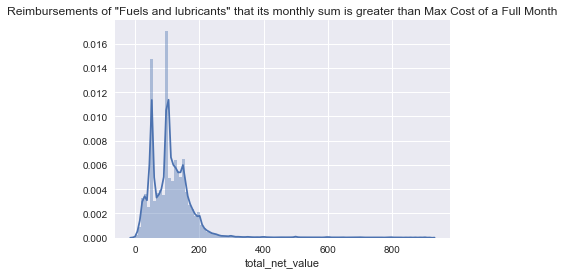

In [75]:
sns.distplot(fuel_outlier_monthlycost['total_net_value'],bins=100)
plt.title('Reimbursements of "Fuels and lubricants" that its monthly sum is greater than Max Cost of a Full Month')

In [76]:
fuel_outlier_monthlycost['total_net_value'].sum()

34793554.880000003

In [77]:
fuel_outlier_monthlycost['total_net_value'].describe()

count    297947.000000
mean        116.777665
std          90.361459
min           0.010000
25%          60.010000
50%         100.010000
75%         144.480000
max         916.970000
Name: total_net_value, dtype: float64

### We found 297,947 reimbursements (R$34.7 millions) that its monthly sum was greater than Max Cost of a Full Month. 

# "Automotive vehicle renting or charter"

In the case of "Automotive vehicle renting or charter" the car rented could be used by the congressman or by an advisor.

In this case, we will try to determine a moral limit. If the congressman paid more to rent a car than the cost to buy a car it isn't morally acceptable. So, we will use how a yearly limit for use of this subquota the price of one car. If the congressman buys a car per year, at the end of his mandate he could have a small fleet in his cabinet.

We will use the price in dec/2016 of the most seller car in Brazil.

Onix - R$ 37,980.00

Sources:

[Most seller car](http://exame.abril.com.br/negocios/os-50-carros-mais-vendidos-em-2016/)

[Car cost](http://veiculos.fipe.org.br?carro/gm-chevrolet/12-2016/004423-7/32000/g/spmzgw4lwhp) FIP code004423-7, in dec/2016

In [78]:
car_cost = 37980

In [79]:
rent_car_congressperson = rent_car.groupby(['congressperson_id',
                                    'year',]).agg({'total_net_value':sum})
rent_car_congressperson = rent_car_congressperson.reset_index()
rent_car_congressperson = rent_car_congressperson[rent_car_congressperson['total_net_value'] >= car_cost].reset_index()
rent_car_congressperson['cong_year'] = rent_car_congressperson['congressperson_id'].map(str)+rent_car_congressperson['year'].map(str)
cong_year = rent_car_congressperson['cong_year'].unique()

rent_car['cong_year'] = rent_car['congressperson_id'].map(str)+rent_car['year'].map(str)
rent_car_outlier = rent_car[rent_car['cong_year'].isin(cong_year)]

del rent_car_outlier['cong_year']
rent_car_outlier['suspect'] = "Rent car monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


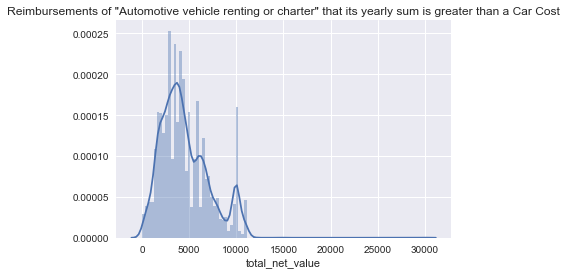

In [80]:
sns.distplot(rent_car_outlier['total_net_value'],bins=100)
plt.title('Reimbursements of "Automotive vehicle renting or charter" that its yearly sum is greater than a Car Cost')

In [81]:
rent_car_outlier['total_net_value'].sum()

60085362.260000005

In [82]:
rent_car_outlier['total_net_value'].describe()

count    13205.000000
mean      4550.197824
std       2559.621817
min         34.430000
25%       2700.000000
50%       4000.000000
75%       6000.000000
max      30000.000000
Name: total_net_value, dtype: float64

### We found 13,205 reimbursements (R$60 millions) that its yearly sum was greater than a Car Cost. 

# "Automotive vehicle renting or watercraft charter" and "Watercraft renting or charter"

We can see when the subquota "Automotive vehicle renting or watercraft charter" was split almost all its expenses were about car rent. How the main purpose of rent a boat and rent a car is the same for a congressman, we will use the same limit for this two subquotas, the cost of one car R$37,890.

"Automotive vehicle renting or watercraft charter"

In [83]:
rent_car_and_boat_congressperson = rent_car_and_boat.groupby(['congressperson_id',
                                    'year',]).agg({'total_net_value':sum})
rent_car_and_boat_congressperson = rent_car_and_boat_congressperson.reset_index()
rent_car_and_boat_congressperson = rent_car_and_boat_congressperson[rent_car_and_boat_congressperson['total_net_value'] >= car_cost].reset_index()
rent_car_and_boat_congressperson['cong_year'] = rent_car_and_boat_congressperson['congressperson_id'].map(str)+rent_car_and_boat_congressperson['year'].map(str)
cong_year = rent_car_and_boat_congressperson['cong_year'].unique()

rent_car_and_boat['cong_year'] = rent_car_and_boat['congressperson_id'].map(str)+rent_car_and_boat['year'].map(str)
rent_car_and_boat_outlier = rent_car_and_boat[rent_car_and_boat['cong_year'].isin(cong_year)]

del rent_car_and_boat_outlier['cong_year']
rent_car_and_boat_outlier['suspect'] = "Rent car and boat monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


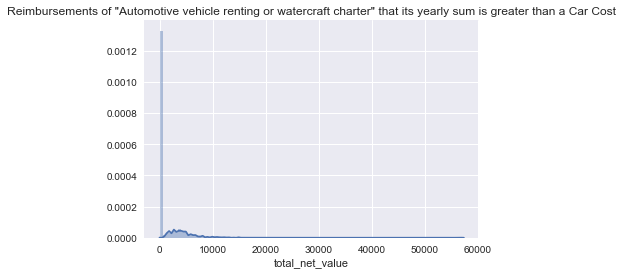

In [84]:
sns.distplot(rent_car_and_boat_outlier['total_net_value'],bins=100)
plt.title('Reimbursements of "Automotive vehicle renting or watercraft charter" that its yearly sum is greater than a Car Cost')

In [85]:
rent_car_and_boat_outlier['total_net_value'].sum()

75551744.719999999

In [86]:
rent_car_and_boat_outlier['total_net_value'].describe()

count    69985.000000
mean      1079.541969
std       2357.417022
min          0.100000
25%          6.400000
50%         14.000000
75%        257.080000
max      57333.000000
Name: total_net_value, dtype: float64

### We found 69,985 reimbursements (R$75.5 millions) that its yearly sum was greater than a Car Cost. 

"Watercraft renting or charter"

In [87]:
rent_boat_congressperson = rent_boat.groupby(['congressperson_id',
                                    'year',]).agg({'total_net_value':sum})
rentboat_congressperson = rent_boat_congressperson.reset_index()
rent_boat_congressperson = rent_boat_congressperson[rent_boat_congressperson['total_net_value'] >= car_cost].reset_index()
rent_boat_congressperson['cong_year'] = rent_boat_congressperson['congressperson_id'].map(str)+rent_boat_congressperson['year'].map(str)
cong_year = rent_boat_congressperson['cong_year'].unique()

rent_boat['cong_year'] = rent_boat['congressperson_id'].map(str)+rent_boat['year'].map(str)
rent_boat_outlier = rent_boat[rent_boat['cong_year'].isin(cong_year)]

del rent_boat_outlier['cong_year']
rent_boat_outlier['suspect'] = "Rent boat monthly"

C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fabio\Anaconda3\envs\serenata_de_amor\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


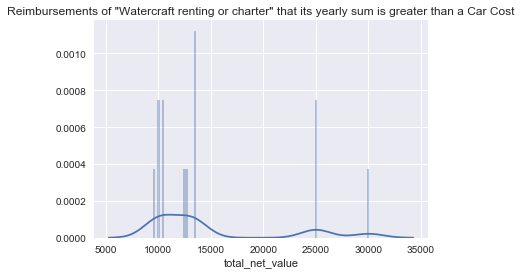

In [88]:
sns.distplot(rent_boat_outlier['total_net_value'],bins=100)
plt.title('Reimbursements of "Watercraft renting or charter" that its yearly sum is greater than a Car Cost')

In [89]:
rent_boat_outlier['total_net_value'].sum()

196300.0

In [90]:
rent_boat_outlier['total_net_value'].describe()

count       13.000000
mean     15100.000000
std       6867.132468
min       9500.000000
25%      10500.000000
50%      12600.000000
75%      13500.000000
max      30050.010000
Name: total_net_value, dtype: float64

### We found 13 reimbursements (R$196,300) that its yearly sum was greater than a Car Cost. 

# The Suspects

In this last part we will analize the suspects reimbursements

In [91]:
suspects_reimbursements = pd.DataFrame()
suspects_reimbursements = suspects_reimbursements.append(fuel_outliers_redflag)
suspects_reimbursements = suspects_reimbursements.append(fuel_outliers_yellowflag)
suspects_reimbursements = suspects_reimbursements.append(fuel_outlier_monthlycost)
suspects_reimbursements = suspects_reimbursements.append(rent_car_outlier)
suspects_reimbursements = suspects_reimbursements.append(rent_car_and_boat_outlier)
suspects_reimbursements = suspects_reimbursements.append(rent_boat_outlier)
suspects_reimbursements = suspects_reimbursements.sort_values('total_net_value', ascending=False)
suspects_reimbursements.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values,suspect
189223,2010,1157,1823608,NaN,57333.0,3301,ROBERTO ROCHA,74209,83,2007.0,...,57333.0,0.0,57333.0,4,0,NaN,NaN,467627,NaN,Rent car and boat monthly
225556,2010,1559,1917495,NaN,35890.0,3420,CLÓVIS FECURY,74026,73,2007.0,...,35890.0,0.0,35890.0,8,0,NaN,NaN,492715,NaN,Rent car and boat monthly
546046,2011,2370,2235266,NaN,34650.0,3832,ALMEIDA LIMA,160626,173,2011.0,...,34650.0,0.0,34650.0,10,0,NaN,NaN,583859,NaN,Rent car and boat monthly
931857,2013,2370,5128758,NaN,34500.0,4306,ALMEIDA LIMA,160626,173,2011.0,...,34500.0,0.0,34500.0,5,0,NaN,NaN,1034145,NaN,Rent car and boat monthly
931870,2013,2370,5226664,NaN,34500.0,4412,ALMEIDA LIMA,160626,173,2011.0,...,34500.0,0.0,34500.0,9,0,NaN,NaN,1059724,NaN,Rent car and boat monthly


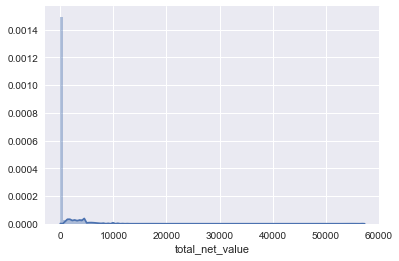

In [92]:
sns.distplot(suspects_reimbursements['total_net_value'],bins=100)

In [93]:
suspects_reimbursements['total_net_value'].sum()

240499642.41000006

In [94]:
suspects_reimbursements['total_net_value'].describe()

count    406847.000000
mean        591.130431
std        1512.075190
min           0.010000
25%          50.000000
50%         100.070000
75%         163.655000
max       57333.000000
Name: total_net_value, dtype: float64

Who are these congresspeople?

In [95]:
suspects_congresspeople = suspects_reimbursements.groupby(['congressperson_name']).agg({'total_net_value':sum}).sort_values('total_net_value',ascending=False)
suspects_congresspeople.head()

,total_net_value
congressperson_name,
ARNON BEZERRA,1540553.00
LÚCIO VALE,1400325.87
SILVIO COSTA,1343502.48
GIVALDO CARIMBÃO,1333936.80
CLAUDIO CAJADO,1164690.70


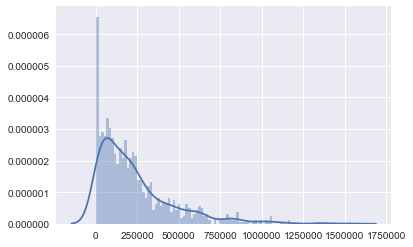

In [96]:
sns.distplot(suspects_congresspeople,bins=100)

In [97]:
suspects_congresspeople['total_net_value'].describe()

count    1.031000e+03
mean     2.332683e+05
std      2.321604e+05
min      1.000000e+03
25%      6.773930e+04
50%      1.685569e+05
75%      3.188980e+05
max      1.540553e+06
Name: total_net_value, dtype: float64

Which are these companies?

In [98]:
suspects_companies = suspects_reimbursements.groupby(['cnpj_cpf']).agg({'total_net_value':sum}).sort_values('total_net_value',ascending=False)
suspects_companies.head()

,total_net_value
cnpj_cpf,
11842749000100,2284717.14
07447405000111,1537529.16
02570474000102,1438374.00
11869422000114,1123039.61
10892621000180,1105514.10


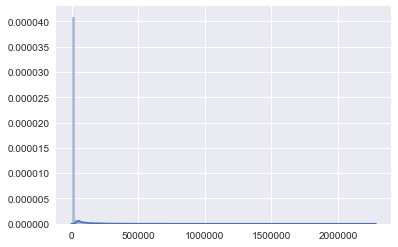

In [99]:
sns.distplot(suspects_companies,bins=100)

In [100]:
suspects_companies['total_net_value'].describe()

count    2.451700e+04
mean     9.809364e+03
std      5.185810e+04
min      2.000000e-02
25%      1.200000e+02
50%      3.040200e+02
75%      1.238850e+03
max      2.284717e+06
Name: total_net_value, dtype: float64

# Conclusion

After to analyze six kinds of suspects reimbursement we found R$240 million to be investigated. There are 1,031 congresspeople and 24,517 companies in this list.